In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler



In [15]:
Reliance_Stock = pd.read_csv("reliance_data.csv")

print(Reliance_Stock.head())
print(Reliance_Stock.info())

         Date    Symbol Series  Prev Close    Open    High     Low  Last  \
0  01-01-1996  RELIANCE     EQ      204.65  205.00  206.10  203.65   NaN   
1  02-01-1996  RELIANCE     EQ      205.75  205.25  206.25  202.65   NaN   
2  03-01-1996  RELIANCE     EQ      204.15  207.50  216.95  205.25   NaN   
3  04-01-1996  RELIANCE     EQ      205.70  203.75  204.40  201.05   NaN   
4  05-01-1996  RELIANCE     EQ      203.80  203.00  203.00  200.65   NaN   

    Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  205.75  205.26  3717450  7.630000e+13     NaN                 NaN   
1  204.15  204.13  6024650  1.230000e+14     NaN                 NaN   
2  205.70  207.04  7473500  1.550000e+14     NaN                 NaN   
3  203.80  202.47  7744000  1.570000e+14     NaN                 NaN   
4  202.40  202.05  5952000  1.200000e+14     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
<class '

#####  Handle Missing Values

In [16]:
print("Missing values before cleaning:")
print(Reliance_Stock.isnull().sum())
Reliance_Stock['Date'] = pd.to_datetime(Reliance_Stock['Date'], format='%d-%m-%Y')

print(Reliance_Stock.shape)

num_imputer = SimpleImputer(strategy='median')
cal_imputer = SimpleImputer(strategy='most_frequent')

num_cols = Reliance_Stock.select_dtypes(include=[np.number]).columns
cal_cols = Reliance_Stock.select_dtypes(exclude=["number"]).columns

Reliance_Stock[num_cols] = num_imputer.fit_transform(Reliance_Stock[num_cols])
Reliance_Stock[cal_cols] = cal_imputer.fit_transform(Reliance_Stock[cal_cols])


print(Reliance_Stock.head())




Missing values before cleaning:
Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                   548
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                3849
Deliverable Volume    1512
%Deliverble           1512
dtype: int64
(6205, 15)
        Date    Symbol Series  Prev Close    Open    High     Low    Last  \
0 1996-01-01  RELIANCE     EQ      204.65  205.00  206.10  203.65  892.35   
1 1996-01-02  RELIANCE     EQ      205.75  205.25  206.25  202.65  892.35   
2 1996-01-03  RELIANCE     EQ      204.15  207.50  216.95  205.25  892.35   
3 1996-01-04  RELIANCE     EQ      205.70  203.75  204.40  201.05  892.35   
4 1996-01-05  RELIANCE     EQ      203.80  203.00  203.00  200.65  892.35   

    Close    VWAP     Volume      Turnover   Trades  Deliverable Volume  \
0

In [17]:
print("Missing values after cleaning:")
print(Reliance_Stock.isnull().sum())

Missing values after cleaning:
Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


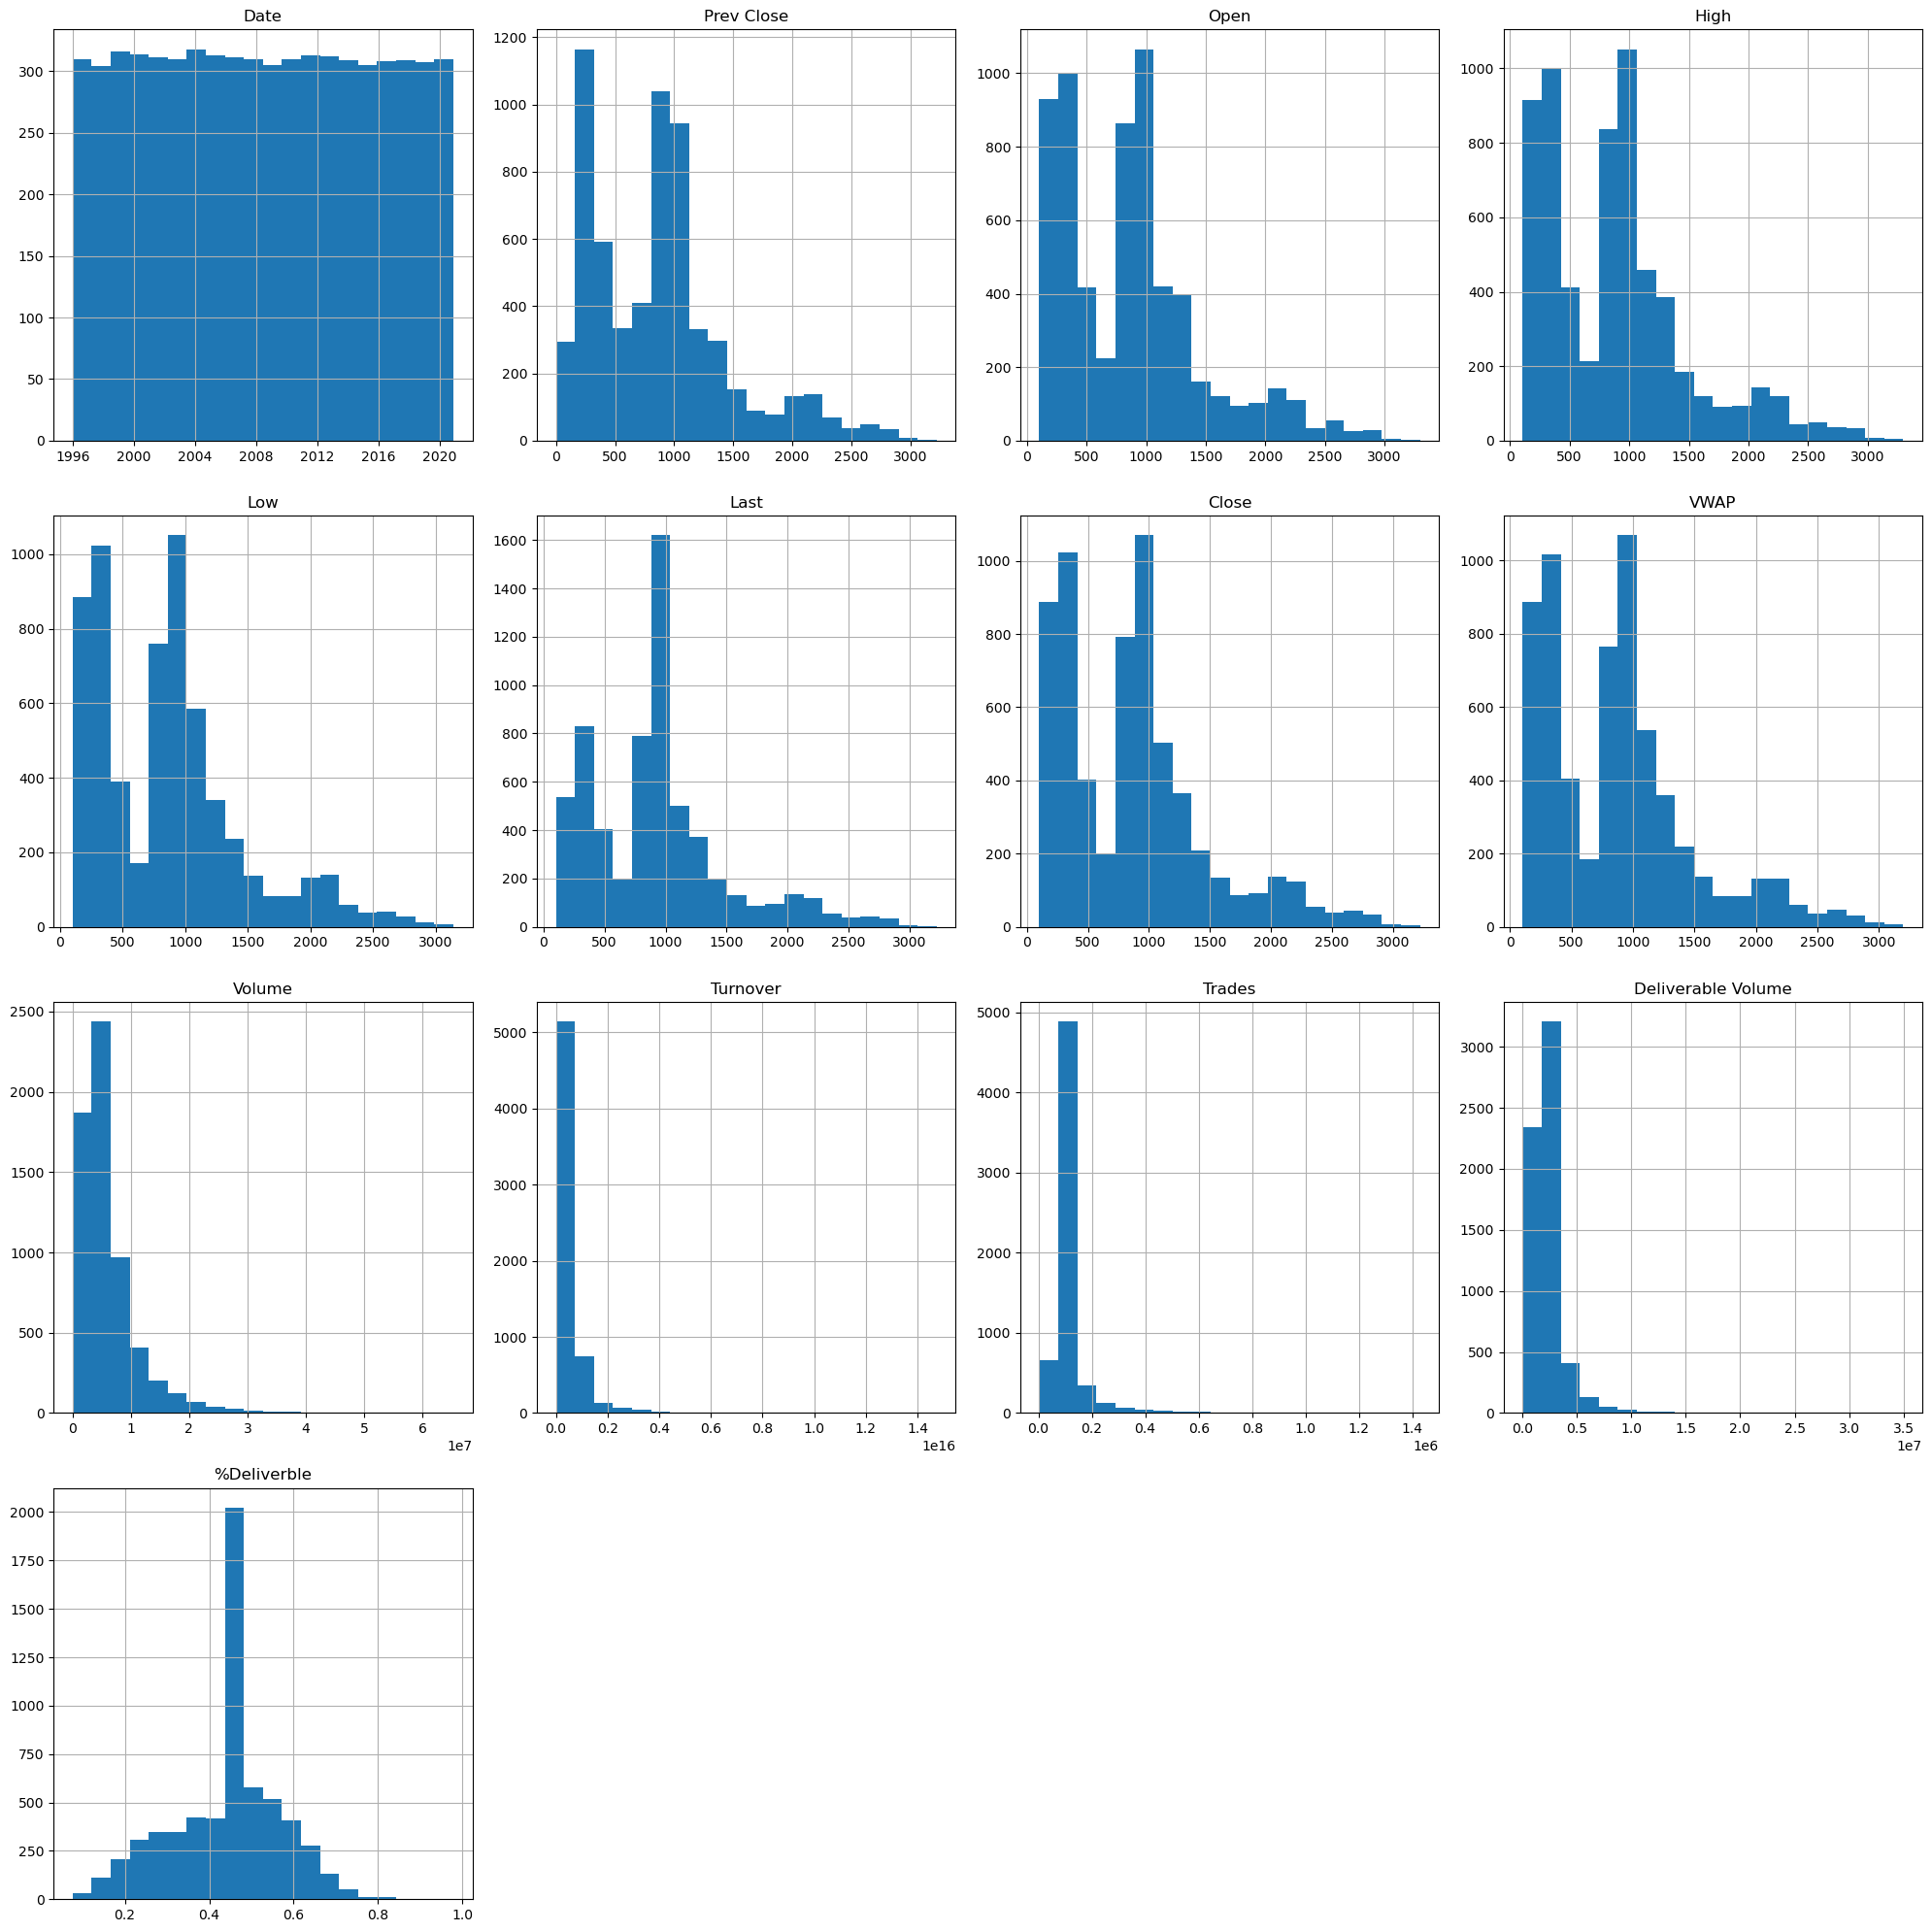

In [18]:
Reliance_Stock.hist(figsize=(20,20),bins=20)
plt.tight_layout()
plt.show()

In [19]:
# Correlation matrix
Correlation_matrix = Reliance_Stock[num_cols].corr()

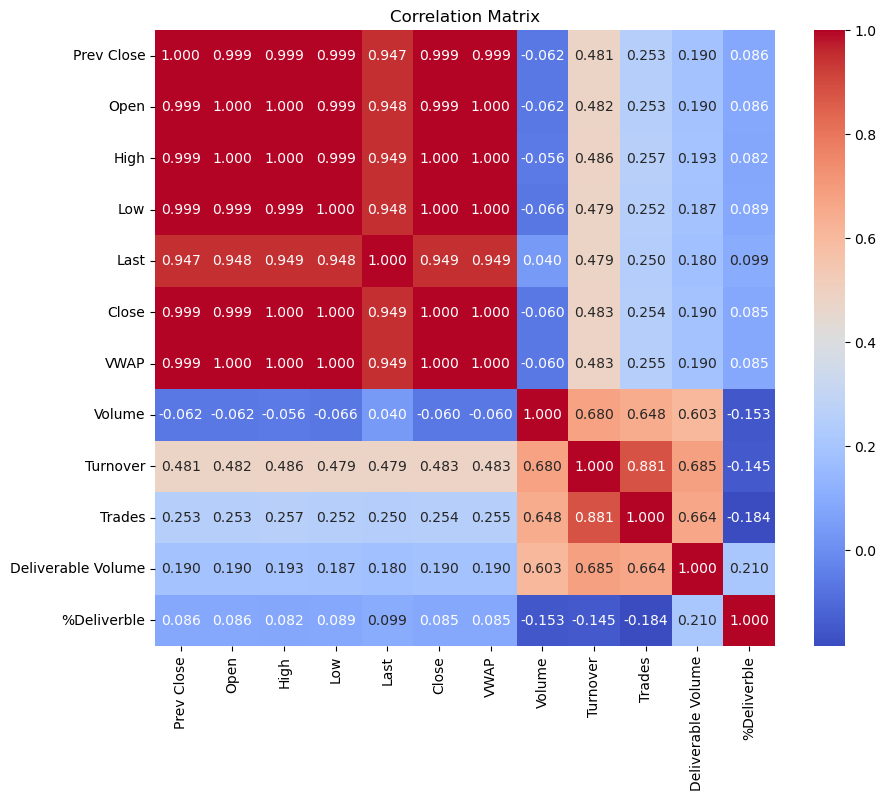

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

**Data Preprocessing**

In [21]:
# Selelcting features and target variable
# Assuming 'Close Price' is the target variable

from sklearn.discriminant_analysis import StandardScaler


x = Reliance_Stock[num_cols].drop(columns=['Close'])
y = Reliance_Stock['Close']

x_train, x_test, y_train, y_test_simple = train_test_split(x, y, test_size=0.2,shuffle=False, random_state=42)

scaler = StandardScaler()

#feature scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



Most correlated feature with Close price: VWAP
Mean Squared Error (Simple Linear Regression): 90.27
R^2 Score (Simple Linear Regression): 0.99917


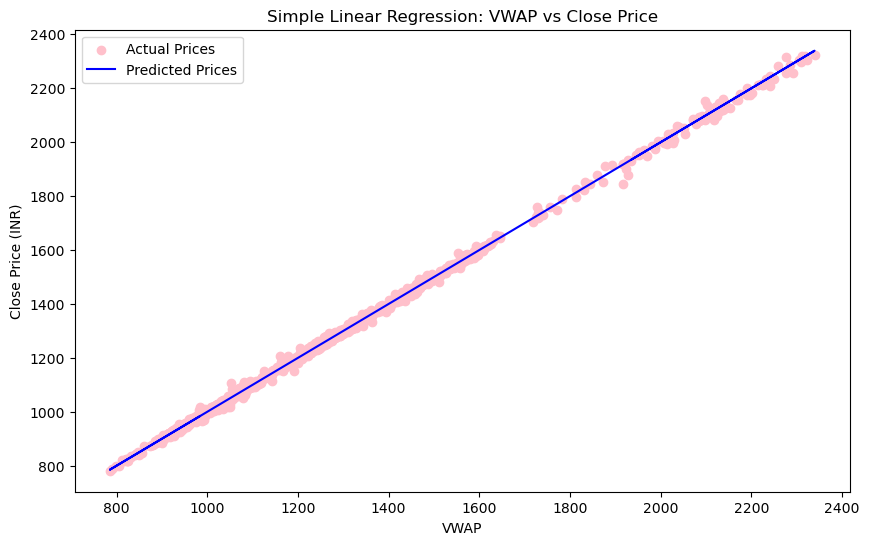

In [22]:
from sklearn.metrics import r2_score, mean_squared_error
corr_with_target =Correlation_matrix ['Close'].sort_values(ascending=False)

best_feature = corr_with_target.index[1]
print(f"\nMost correlated feature with Close price: {best_feature}")

x_train_simple = x_train[[best_feature]]
x_test_simple = x_test[[best_feature]]

simple_lr = LinearRegression()

simple_lr.fit(x_train_simple, y_train)
y_pred_simple = simple_lr.predict(x_test_simple)

mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
print(f"Mean Squared Error (Simple Linear Regression): {mse_simple:.2f}")

r2_score_simple = r2_score(y_test_simple, y_pred_simple)
print(f"R^2 Score (Simple Linear Regression): {r2_score_simple:.5f}")

############ Visualize the Results ###########
plt.figure(figsize=(10, 6))
plt.scatter(x_test_simple, y_test_simple, color='pink', label='Actual Prices')
plt.plot(x_test_simple, y_pred_simple, color='blue', label='Predicted Prices')

 
plt.title(f'Simple Linear Regression: {best_feature} vs Close Price') 
plt.xlabel(best_feature)
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()


Multiple Linear Regression : 

In [23]:
# Show correlation of all numeric features with 'Close'

correlations = Reliance_Stock.corr(numeric_only=True)['Close'].sort_values(ascending=False)
print(correlations)


Close                 1.000000
VWAP                  0.999856
Low                   0.999580
High                  0.999562
Open                  0.999152
Prev Close            0.998626
Last                  0.948828
Turnover              0.482729
Trades                0.254233
Deliverable Volume    0.190148
%Deliverble           0.084501
Volume               -0.060018
Name: Close, dtype: float64


R²: 0.9996659257616715
Mean Squared Error: 113.54080177732376


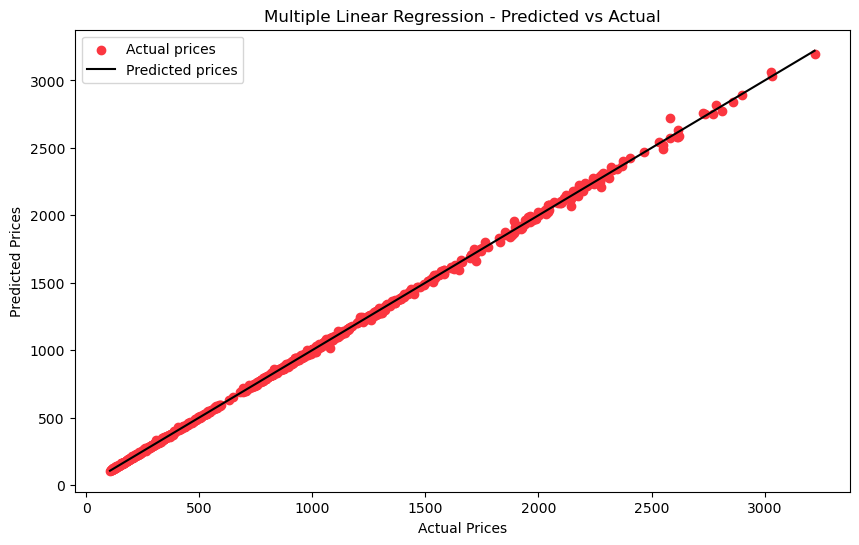

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = Reliance_Stock[['VWAP', 'Low']]  
y = Reliance_Stock['Close']  

X_train, X_test, y_train, y_test_multi = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# predicting 
y_pred_multi = model.predict(X_test)

# Evaluate the model
print(f"R²: {r2_score(y_test_multi, y_pred_multi)}") 
print(f"Mean Squared Error: {mean_squared_error(y_test_multi, y_pred_multi)}")
#Visualization the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, color='#fb3640', label='Actual prices')
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'black', label= 'Predicted prices')  
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Linear Regression - Predicted vs Actual")
plt.legend()
plt.grid(False)
plt.show()

Polynomial Regression : 

Polynomial Regression Degree 2 R²: 0.9996643683583992
Polynomial Regression Degree 2 MSE: 114.07011172081863
Polynomial Regression Degree 3 R²: 0.9996645124307281
Polynomial Regression Degree 3 MSE: 114.02114629383117
Polynomial Regression Degree 4 R²: 0.9996631143556063
Polynomial Regression Degree 4 MSE: 114.49630586033038


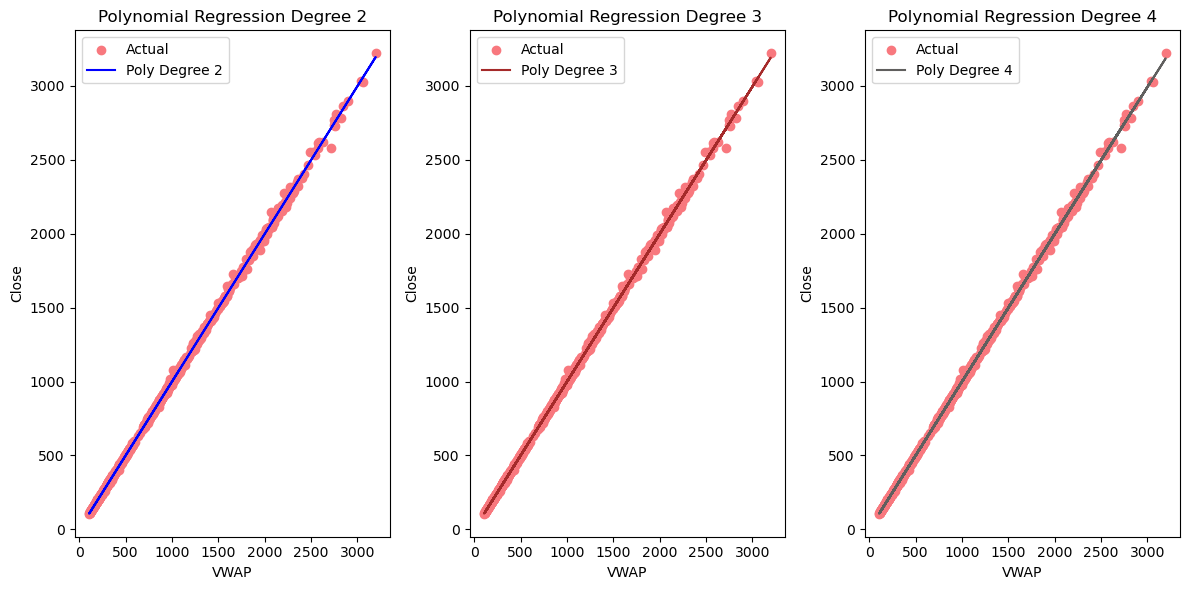

In [ ]:
X = Reliance_Stock[['VWAP']]  
y = Reliance_Stock['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Polynomial Regression for degree 2
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X_train)
scaler = StandardScaler() 
# Scaling the polynomial features
X_poly2_scaled = scaler.fit_transform(X_poly2)
poly_reg2 = LinearRegression()
poly_reg2.fit(X_poly2_scaled, y_train)
y_pred_poly2 = poly_reg2.predict(scaler.transform(poly2.transform(X_test)))

# Polynomial Regression for degree 3
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X_train)
X_poly3_scaled = scaler.fit_transform(X_poly3) 
poly_reg3 = LinearRegression()
poly_reg3.fit(X_poly3_scaled, y_train)
y_pred_poly3 = poly_reg3.predict(scaler.transform(poly3.transform(X_test)))

# Polynomial Regression for degree 4
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X_train)
X_poly4_scaled = scaler.fit_transform(X_poly4) 
poly_reg4 = LinearRegression()
poly_reg4.fit(X_poly4_scaled, y_train)
y_pred_poly4 = poly_reg4.predict(scaler.transform(poly4.transform(X_test)))

#Evaluating the models
print(f"Polynomial Regression Degree 2 R²: {r2_score(y_test, y_pred_poly2)}")
print(f"Polynomial Regression Degree 2 MSE: {mean_squared_error(y_test, y_pred_poly2)}")
print(f"Polynomial Regression Degree 3 R²: {r2_score(y_test, y_pred_poly3)}")
print(f"Polynomial Regression Degree 3 MSE: {mean_squared_error(y_test, y_pred_poly3)}")
print(f"Polynomial Regression Degree 4 R²: {r2_score(y_test, y_pred_poly4)}")
print(f"Polynomial Regression Degree 4 MSE: {mean_squared_error(y_test, y_pred_poly4)}")

# Visualiziation of the results
plt.figure(figsize=(12, 6))

# Plot for degree 2
plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, color='#F8787E', label='Actual')
plt.plot(X_test, y_pred_poly2, color='blue', label='Poly Degree 2')
plt.title('Polynomial Regression Degree 2')
plt.xlabel('VWAP')
plt.ylabel('Close')
plt.legend()
# Plot for degree 3
plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='#F8787E', label='Actual')
plt.plot(X_test, y_pred_poly3, color='brown', label='Poly Degree 3')
plt.title('Polynomial Regression Degree 3')
plt.xlabel('VWAP')
plt.ylabel('Close')
plt.legend()
# Plot for degree 4
plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='#F8787E', label='Actual')
plt.plot(X_test, y_pred_poly4, color='#605f5e', label='Poly Degree 4')
plt.title('Polynomial Regression Degree 4')
plt.xlabel('VWAP')
plt.ylabel('Close')
plt.legend()

plt.tight_layout()
plt.show()


Comparison between models :

In [26]:
simple_results = {    
    'Model': 'Simple Linear',
    'R²':  r2_score(y_test_simple, y_pred_simple),
    'MSE': mean_squared_error(y_test_simple, y_pred_simple),
    'Features': best_feature
}

multi_results = {
    'Model': 'Multiple Linear',
    'R²': r2_score(y_test_multi, y_pred_multi),
    'MSE': mean_squared_error(y_test_multi, y_pred_multi),
    'Features': 'VWAP, Low' 
}

poly_results = []
for degree, y_pred_poly in zip([2, 3, 4], [y_pred_poly2, y_pred_poly3, y_pred_poly4]):
    poly_results.append({
        'Model': f'Polynomial degree {degree} ',
        'R²': r2_score(y_test, y_pred_poly),
        'MSE': mean_squared_error(y_test, y_pred_poly),
        'Features': best_feature
    })

all_results = [simple_results, multi_results] + poly_results
comparison_df = pd.DataFrame(all_results)
print(comparison_df)

                  Model        R²         MSE   Features
0         Simple Linear  0.999174   90.269463       VWAP
1       Multiple Linear  0.999666  113.540802  VWAP, Low
2  Polynomial degree 2   0.999664  114.070112       VWAP
3  Polynomial degree 3   0.999665  114.021146       VWAP
4  Polynomial degree 4   0.999663  114.496306       VWAP


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
df =pd.read_csv("diabetes_prediction_dataset.csv")

In [43]:
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [45]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Converting non-numeric columns to numeric values: LabelEncoder: 
I used LabelEncoder from the sklearn.preprocessing library to convert non-numeric columns (like gender and smoking_history) into numeric values.

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

df['smoking_history'] = le.fit_transform(df['smoking_history'].fillna('No Info')) 

print(df.dtypes)


gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [49]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [51]:
print("   Diabetes distribution:")
print(df['diabetes'].value_counts(normalize=True))

   Diabetes distribution:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


In [53]:
df = df.dropna()


In [55]:
df.shape

(100000, 9)

In [57]:
df.duplicated().sum()

3854

In [61]:
df=df.drop_duplicates()

In [63]:
df.shape

(96146, 9)

In [65]:
corr_matrix = df.corr()
corr_matrix

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028968,0.014007,0.078312,-0.079239,-0.023461,0.019836,0.017830,0.037613
age,-0.028968,1.000000,0.257305,0.238451,0.241128,0.344797,0.106719,0.114317,0.264927
hypertension,0.014007,0.257305,1.000000,0.119982,0.087892,0.148111,0.081441,0.084834,0.195710
heart_disease,0.078312,0.238451,0.119982,1.000000,0.023608,0.061376,0.068140,0.070832,0.170711
smoking_history,-0.079239,0.241128,0.087892,0.023608,1.000000,0.183840,0.035518,0.038259,0.088471
bmi,-0.023461,0.344797,0.148111,0.061376,0.183840,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.019836,0.106719,0.081441,0.068140,0.035518,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.017830,0.114317,0.084834,0.070832,0.038259,0.092543,0.171615,1.000000,0.424336
diabetes,0.037613,0.264927,0.195710,0.170711,0.088471,0.214932,0.406408,0.424336,1.000000


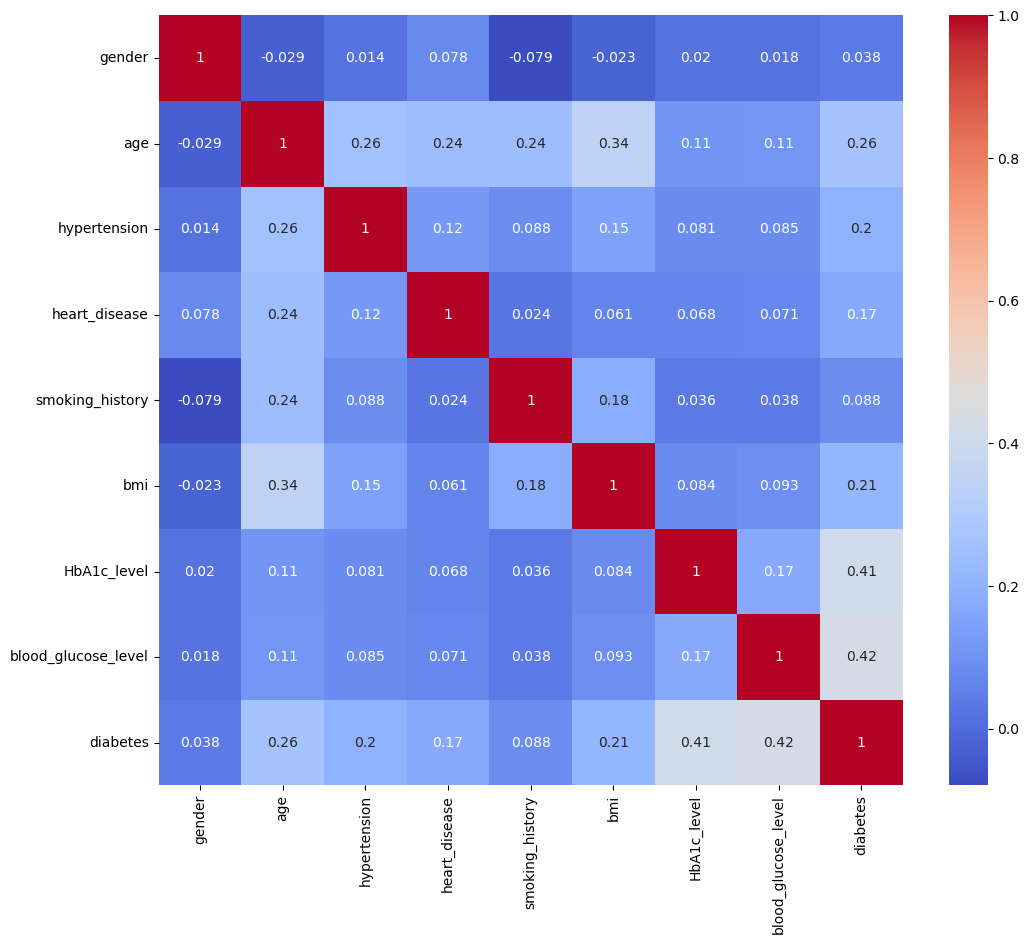

In [67]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [69]:
X = df[['blood_glucose_level']]
y = df['diabetes']

In [71]:
X.head()

,blood_glucose_level
0,140
1,80
2,158
3,155
4,155


In [73]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

Simple Logistic Regression:


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [81]:
lr_simple = LogisticRegression()


In [83]:
lr_simple.fit(X_train, y_train)


LogisticRegression()

In [85]:
lr_simple.coef_


array([[0.03414931]])

In [87]:
lr_simple.intercept_


array([-7.74720874])

Logistic with Multiple Predictor:


In [89]:
X = df.loc[:, df.columns != 'diabetes']


In [91]:
y = df['diabetes']


In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [95]:
lr_multiple = LogisticRegression()
lr_multiple.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
lr_multiple.coef_


array([[6.26715295e-01, 2.68986126e-02, 1.28054591e+00, 3.32516027e+00,
        2.53305530e-03, 9.67228114e-02, 1.68448946e+00, 3.71512177e-02]])

In [99]:
lr_multiple.intercept_


array([-23.55941041])

In [101]:
lr_multiple.predict_proba(x_train)


array([[0.82705678, 0.17294322],
       [0.99894534, 0.00105466],
       [0.99882077, 0.00117923],
       ...,
       [0.96905299, 0.03094701],
       [0.99748098, 0.00251902],
       [0.90754725, 0.09245275]])

In [103]:
lr_multiple.predict_proba(x_test)


array([[9.73469940e-01, 2.65300599e-02],
       [1.24826616e-01, 8.75173384e-01],
       [9.99087377e-01, 9.12623389e-04],
       ...,
       [9.99695392e-01, 3.04607919e-04],
       [9.95765368e-01, 4.23463172e-03],
       [9.93598885e-01, 6.40111539e-03]])

In [105]:
y_pred = lr_multiple.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

Confusion Matrix: 
After we have trained our model and our model is predicting the classes of y. We can make a confusion matrix, which can tell us the performance of our model.

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17201,   288],
       [  645,  1096]], dtype=int64)

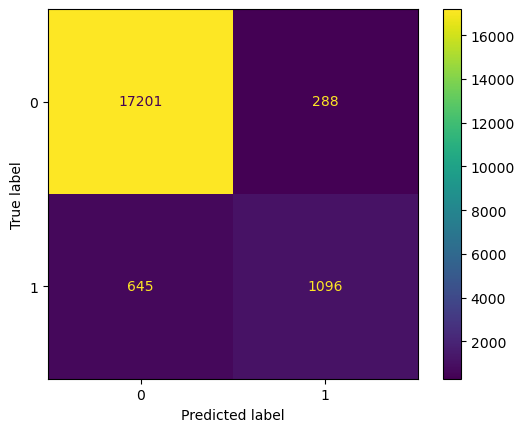

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [111]:
y_pred = lr_multiple.predict(X)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Visualization using Seaborn Heatmap:


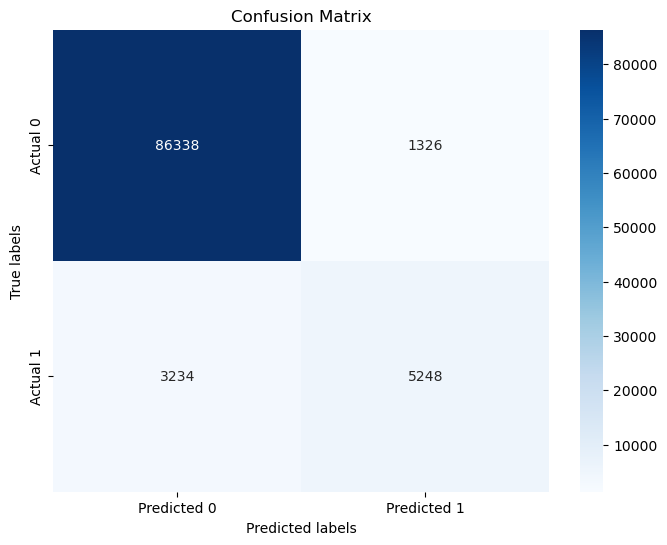

In [115]:
import seaborn as sns

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [117]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y, y_pred)
print(accuracy)

0.9525721298857986


we conclude that the accuracy of our model is 95.25% .